### 1. Random Normal Iniatializer

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.datasets import make_classification

import tensorflow
import keras
from keras.layers import InputLayer, Dense, Dropout
from keras.optimizers import SGD
from keras.models import Sequential
from keras.initializers import RandomUniform, RandomNormal

from keras.callbacks import EarlyStopping

In [2]:
X, y, = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, class_sep=2, random_state=1)

<Axes: >

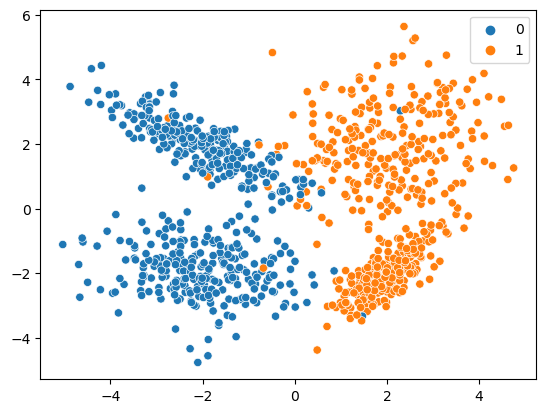

In [3]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [4]:
#First splitting into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1, stratify=y)

#Second splitting into test validation
X_traincv, X_testcv, y_traincv, y_testcv = train_test_split(X_train, y_train, test_size=0.1, random_state=1, stratify=y_train)


In [5]:
#Standardization

from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_traincv = std.fit_transform(X_traincv)
X_testcv = std.transform(X_testcv)

X_train = std.transform(X_train)
X_test = std.transform(X_test)

In [6]:
#Weight Initilization

from keras.initializers import RandomNormal

In [7]:
#It will create a object whenever we call it, 
#It will randomly pic weights from normal distribution, 
#it will give equal negative value and equal symmetric of positive value, 
#and standard dev is 0.05th time of mean, It will increase

ran = RandomNormal(mean=0.0, stddev=0.05, seed=1)

In [8]:
model = Sequential()

model.add(InputLayer(shape=(2,)))
model.add(Dense(units=3,activation='sigmoid', kernel_initializer=ran, bias_initializer=ran))
model.add(Dense(units=2,activation='sigmoid', kernel_initializer=ran, bias_initializer=ran))
model.add(Dense(units=1,activation='sigmoid', kernel_initializer=ran, bias_initializer=ran))


#When we do kernal_inilizer=ran, Its means All our weights and bias are coming for Random Normal Initilizer with mean = 0, std dev = 0.05

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20 (80.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.get_weights()

[array([[ 0.00633252, -0.02465083,  0.03155954],
        [-0.03944233,  0.02841545, -0.07784969]], dtype=float32),
 array([ 0.00633252, -0.02465083,  0.03155954], dtype=float32),
 array([[ 0.00633252, -0.02465083],
        [ 0.03155954, -0.03944233],
        [ 0.02841545, -0.07784969]], dtype=float32),
 array([ 0.00633252, -0.02465083], dtype=float32),
 array([[ 0.00633252],
        [-0.02465083]], dtype=float32),
 array([0.00633252], dtype=float32)]

**Example with less std dev/varaince value**

In [25]:
ran = RandomNormal(mean=0.0, stddev=0.0005, seed=1)

model = Sequential()

model.add(InputLayer(shape=(2,)))
model.add(Dense(units=3,activation='sigmoid', kernel_initializer=ran, bias_initializer=ran))
model.add(Dense(units=2,activation='sigmoid', kernel_initializer=ran, bias_initializer=ran))
model.add(Dense(units=1,activation='sigmoid', kernel_initializer=ran, bias_initializer=ran))


model.get_weights()

#If we give stddev=0.0005 very less, close to zero, It will give less weights value in -e rest to the power.We will get very small weights.
#becz of less std dev value we can have vanishing grad issue.

[array([[ 6.3325155e-05, -2.4650831e-04,  3.1559536e-04],
        [-3.9442329e-04,  2.8415446e-04, -7.7849691e-04]], dtype=float32),
 array([ 6.3325155e-05, -2.4650831e-04,  3.1559536e-04], dtype=float32),
 array([[ 6.3325155e-05, -2.4650831e-04],
        [ 3.1559536e-04, -3.9442329e-04],
        [ 2.8415446e-04, -7.7849691e-04]], dtype=float32),
 array([ 6.3325155e-05, -2.4650831e-04], dtype=float32),
 array([[ 6.3325155e-05],
        [-2.4650831e-04]], dtype=float32),
 array([6.3325155e-05], dtype=float32)]

**Case with less std dev**

In [72]:
ran = RandomNormal(mean=0.0, stddev=0.0005, seed=1)

model = Sequential()

model.add(InputLayer(shape=(2,)))
model.add(Dense(units=1000,activation='sigmoid', kernel_initializer=ran, bias_initializer=ran))
model.add(Dense(units=1,activation='sigmoid', kernel_initializer=ran, bias_initializer=ran))


In [73]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [74]:
model.fit(X_traincv, y_traincv, batch_size=1000, epochs=1, validation_data=(X_testcv, y_testcv), verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4988 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931


**If we need output from first hidden layer not from output layer for that we have to use Functional way of Hidden layer.**

In [75]:
from keras.models import Model

In [76]:
m1 = Model(inputs=model.inputs, outputs=model.layers[0].output)

In [77]:
m1.predict(X_traincv[:1,:])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[0.50009936, 0.50003153, 0.5000935 , 0.5000855 , 0.5000615 ,
        0.5001074 , 0.4997968 , 0.5000948 , 0.5000503 , 0.500216  ,
        0.49996594, 0.49973908, 0.50012517, 0.5001239 , 0.5000813 ,
        0.5000037 , 0.49995556, 0.49981168, 0.5002097 , 0.500177  ,
        0.49995613, 0.49984488, 0.5001147 , 0.50000083, 0.49988398,
        0.499947  , 0.5000156 , 0.50026375, 0.5000308 , 0.49986947,
        0.49978334, 0.5000729 , 0.5000131 , 0.5000061 , 0.49990004,
        0.4999378 , 0.49994212, 0.5001713 , 0.50022936, 0.49998814,
        0.49996883, 0.49994573, 0.5002061 , 0.49985236, 0.49998903,
        0.5000384 , 0.49994817, 0.50005674, 0.5000054 , 0.49998066,
        0.499912  , 0.500135  , 0.50005126, 0.4999165 , 0.49992892,
        0.5000702 , 0.500101  , 0.49999443, 0.50009793, 0.49980745,
        0.50002825, 0.49988753, 0.50007975, 0.499934  , 0.49983016,
        0.50007784, 0.4999182 , 0.5001065 , 0.49994656, 0.5000237 ,
        0.50006485, 0.500021  , 0.50005066, 0.50

In [78]:
m1.predict(X_traincv[:1,:]).shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


(1, 1000)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


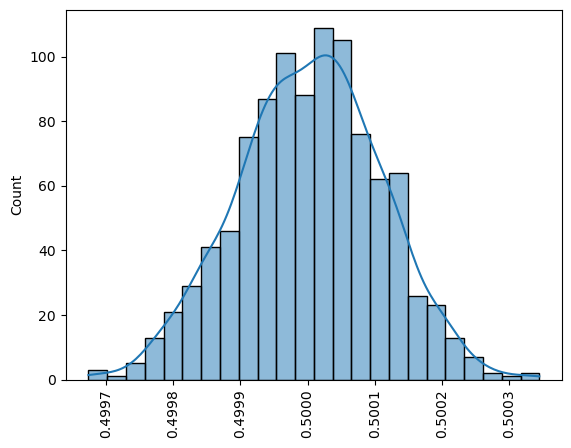

In [79]:
sns.histplot(m1.predict(X_traincv[:1,:]).flatten(), kde=True)
plt.xticks(rotation=90)
plt.show()

**Conclusion:- whenever use Sigmoid and std dev is less, sigmomid value is very close to 0 because we have vanishing gradient problem, Same problem can happen with Tanh, Tanh will more close to zero than sigmoid.**

**Example with more std dev/varaince value**

In [80]:
ran = RandomNormal(mean=0.0, stddev=1000, seed=1)

model = Sequential()

model.add(InputLayer(shape=(2,)))
model.add(Dense(units=3,activation='sigmoid', kernel_initializer=ran, bias_initializer=ran))
model.add(Dense(units=2,activation='sigmoid', kernel_initializer=ran, bias_initializer=ran))
model.add(Dense(units=1,activation='sigmoid', kernel_initializer=ran, bias_initializer=ran))


model.get_weights()

#If we give stddev=1000 very high, It will give more weights value .We will get very high weights.
#becz of high std dev value we can have exploding grad issue.

[array([[  126.65031,  -493.01657,   631.19073],
        [ -788.84656,   568.3089 , -1556.9938 ]], dtype=float32),
 array([ 126.65031, -493.01657,  631.19073], dtype=float32),
 array([[  126.65031,  -493.01657],
        [  631.19073,  -788.84656],
        [  568.3089 , -1556.9938 ]], dtype=float32),
 array([ 126.65031, -493.01657], dtype=float32),
 array([[ 126.65031],
        [-493.01657]], dtype=float32),
 array([126.65031], dtype=float32)]

In [81]:
ran = RandomNormal(mean=0.0, stddev=1000, seed=1)

model = Sequential()

model.add(InputLayer(shape=(2,)))
model.add(Dense(units=1000,activation='sigmoid', kernel_initializer=ran, bias_initializer=ran))
model.add(Dense(units=1,activation='sigmoid', kernel_initializer=ran, bias_initializer=ran))


In [82]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [83]:
model.fit(X_traincv, y_traincv, batch_size=1000, epochs=1, validation_data=(X_testcv, y_testcv), verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7247 - loss: 49960.5469 - val_accuracy: 0.7556 - val_loss: 30919.9492


In [84]:
m1 = Model(inputs=model.inputs, outputs=model.layers[0].output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


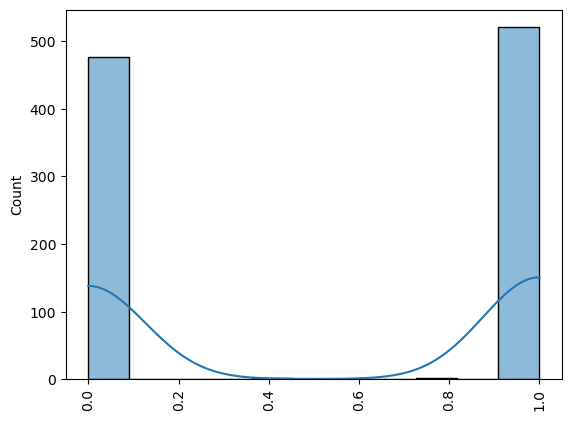

In [87]:
sns.histplot(m1.predict(X_traincv[:1,:]).flatten(), kde=True)
plt.xticks(rotation=90)
plt.show()

**Conclusion:- From plot we can see we are getting value 0 and 1 high values** 

**It is our duty our weights should not very less or very high, It should be appropriate, we have give moderate.**

### 2. Randomo Uniform Initializer

In [88]:
from keras.initializers import RandomUniform

In [90]:
rau = RandomUniform(minval=0.01, maxval=0.08,seed=1)

model = Sequential()

model.add(InputLayer(shape=(2,)))
model.add(Dense(units=3,activation='sigmoid', kernel_initializer=rau, bias_initializer=rau))
model.add(Dense(units=2,activation='sigmoid', kernel_initializer=rau, bias_initializer=rau))
model.add(Dense(units=1,activation='sigmoid', kernel_initializer=rau, bias_initializer=rau))


model.get_weights()

[array([[0.07149417, 0.04219862, 0.05202039],
        [0.03748184, 0.02772353, 0.04110095]], dtype=float32),
 array([0.07149417, 0.04219862, 0.05202039], dtype=float32),
 array([[0.07149417, 0.04219862],
        [0.05202039, 0.03748184],
        [0.02772353, 0.04110095]], dtype=float32),
 array([0.07149417, 0.04219862], dtype=float32),
 array([[0.07149417],
        [0.04219862]], dtype=float32),
 array([0.07149417], dtype=float32)]

**In random uniform initializer Weights will be taken from minmum and max variance/std dev range. Range should be moderate**

### 3. Truncated Normal Initializer

In [91]:
from keras.initializers import TruncatedNormal

In [93]:
trn = TruncatedNormal(mean=0.0, stddev=0.05, seed=1)

model = Sequential()

model.add(InputLayer(shape=(2,)))
model.add(Dense(units=3,activation='sigmoid', kernel_initializer=trn, bias_initializer=trn))
model.add(Dense(units=2,activation='sigmoid', kernel_initializer=trn, bias_initializer=trn))
model.add(Dense(units=1,activation='sigmoid', kernel_initializer=trn, bias_initializer=trn))


model.get_weights()

[array([[ 0.00633252, -0.02465083,  0.03155954],
        [-0.03944233, -0.04549282, -0.01995825]], dtype=float32),
 array([ 0.00633252, -0.02465083,  0.03155954], dtype=float32),
 array([[ 0.00633252, -0.02465083],
        [ 0.03155954, -0.03944233],
        [-0.04549282, -0.01995825]], dtype=float32),
 array([ 0.00633252, -0.02465083], dtype=float32),
 array([[ 0.00633252],
        [-0.02465083]], dtype=float32),
 array([0.00633252], dtype=float32)]

**The values generated are similar to values from a RandomNormal initializer, except that values more than two standard deviations from the mean are discarded and re-drawn.**

### 4. Zero weight Initializers

In [94]:
from keras.initializers import Zeros

In [95]:
z = Zeros()

model = Sequential()

model.add(InputLayer(shape=(2,)))
model.add(Dense(units=3,activation='sigmoid', kernel_initializer=z, bias_initializer=z))
model.add(Dense(units=2,activation='sigmoid', kernel_initializer=z, bias_initializer=z))
model.add(Dense(units=1,activation='sigmoid', kernel_initializer=z, bias_initializer=z))


model.get_weights()

[array([[0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[0., 0.],
        [0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

**All the wights and bias has initialized as zero**

### 5. Ones weights Initializer

In [96]:
from keras.initializers import Ones

In [97]:
one = Ones()

model = Sequential()

model.add(InputLayer(shape=(2,)))
model.add(Dense(units=3,activation='sigmoid', kernel_initializer=one, bias_initializer=one))
model.add(Dense(units=2,activation='sigmoid', kernel_initializer=one, bias_initializer=one))
model.add(Dense(units=1,activation='sigmoid', kernel_initializer=one, bias_initializer=one))


model.get_weights()

[array([[1., 1., 1.],
        [1., 1., 1.]], dtype=float32),
 array([1., 1., 1.], dtype=float32),
 array([[1., 1.],
        [1., 1.],
        [1., 1.]], dtype=float32),
 array([1., 1.], dtype=float32),
 array([[1.],
        [1.]], dtype=float32),
 array([1.], dtype=float32)]

**All the wights and bias has initialized as 1**

**Zeros, Ones, Random Normal, Random Uniform, Truncated Normal all are this is not depend upon logical structure.**

### Now we will learn Weight initialization tech depend upon logical struture using fan in fan out.

### 1. Glorot Normal Initializer

In [ ]:
from keras.initializers import GlorotNormal 